# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve? The main reason why this problem is important to solve has a base in technology and security. Facial recognition can make security of various places (like aerports and offices) more productive and safe. The recognition of faces and their expressions can make the crime rate to decrease because of the ratio of achievment at the moment of preventing crime, only if there are security cameras available.  <br>
**The objectives:** What is the intended goal? The facial recognition of various emotions.<br>
**The key questions:** What are the key questions that need to be answered?
* Which is the one model that recognizes facial expressions with high perfomance ratio?
* Is it a facial expression difficult to recognize?<br>
**The problem formulation:** What are we trying to solve using data science? What we are trying to solve with data science is done by the development of neural networks for facial recognition. By applying various models comparisions can be made. What we are trying to solve is the recognition of patterns in the different facial expressions made by humans.



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile #Import the zip where the sets are located
import os
import tensorflow as tf


from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
path_zip= '/content/Facial_emotion_images.zip'

with zipfile.ZipFile(path_zip, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
pict_size = 48
folder_ = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

There are few emotions that can be idenfied so easily. Hapiness and surprised are emotions of a lot of expressions involved. Both are related with eyes wide open and mouths showing teeth. But sadness and neutral expressions are so similar. There are no specific signs of sadness or "neutrality". Tears are a sign of sadness, but there are not always present and depend a lot in the face involved. Sometimes neutral expressions can be just the same to a sad expression, this is because there are no specific face expressions directly related to these expressions.

### **Happy**

**Observations and Insights:**Most of the images for "happy" facial expressions consider a person with a big smile in their face as  common way of happiness expression. The grayscale makes easier the visualization due to the difference of color between the smile and the person face.

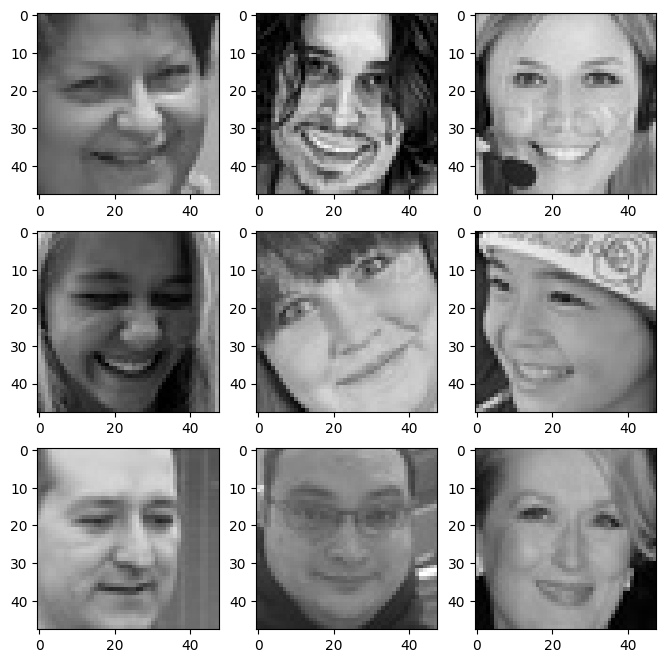

In [ ]:
expr = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_ + "train/" + expr + "/" +
                  os.listdir(folder_ + "train/" + expr)[i], target_size = (pict_size, pict_size))
    plt.imshow(img)

plt.show()

### **Sad**

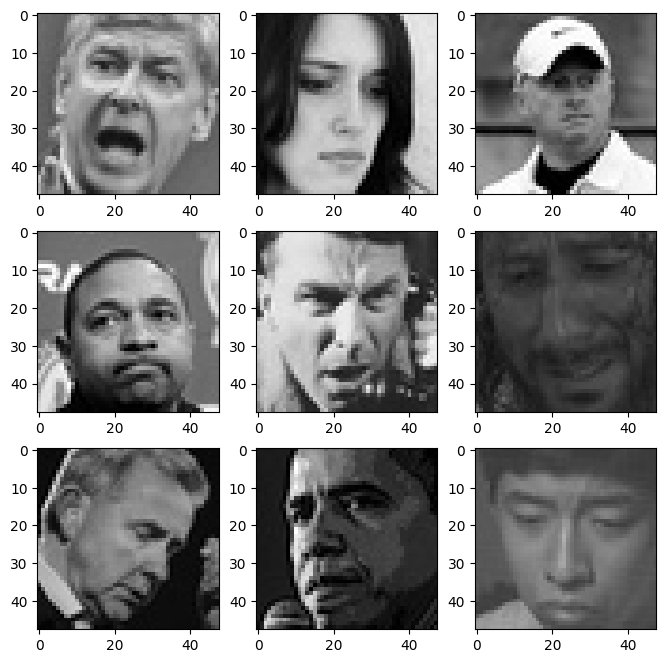

In [ ]:
expr = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_ + "train/" + expr + "/" +
                  os.listdir(folder_ + "train/" + expr)[i], target_size = (pict_size, pict_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:** Maybe the most ambigous of all the facial expressions in this set. A simple way of detecting sadness in someone is by crying, but in this dataset there are other "expressions" of sadness that not necessarily involves crying and that actually can be confused with neutral face expression.

### **Neutral**

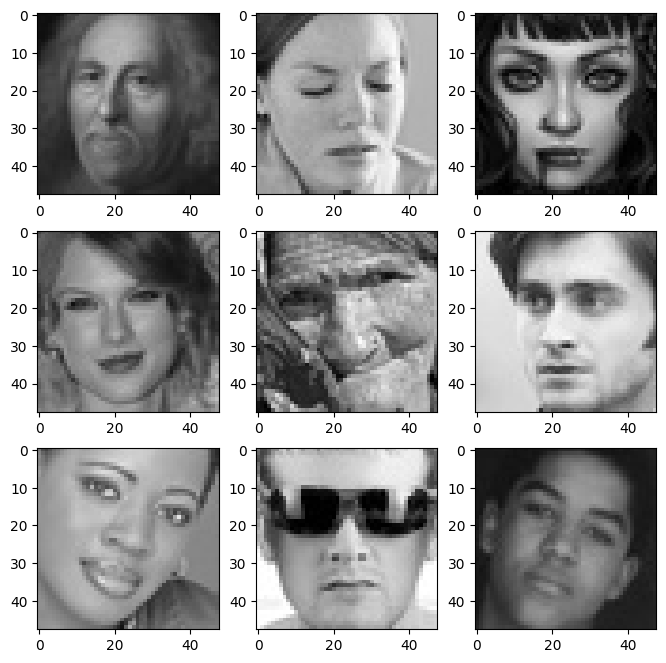

In [ ]:
expr = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_ + "train/" + expr + "/" +
                  os.listdir(folder_ + "train/" + expr)[i], target_size = (pict_size, pict_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**  Probably a lot of misconceptions in this set. A neutral face expression is, for example, the face expression of someone that is taking his photo for his ID or passport, even a person thinking can be considered as a neutral expression. But at the multiple displays of the images for this project, in more than one time, had appeared happy, sad o surprised expressions.

### **Surprised**

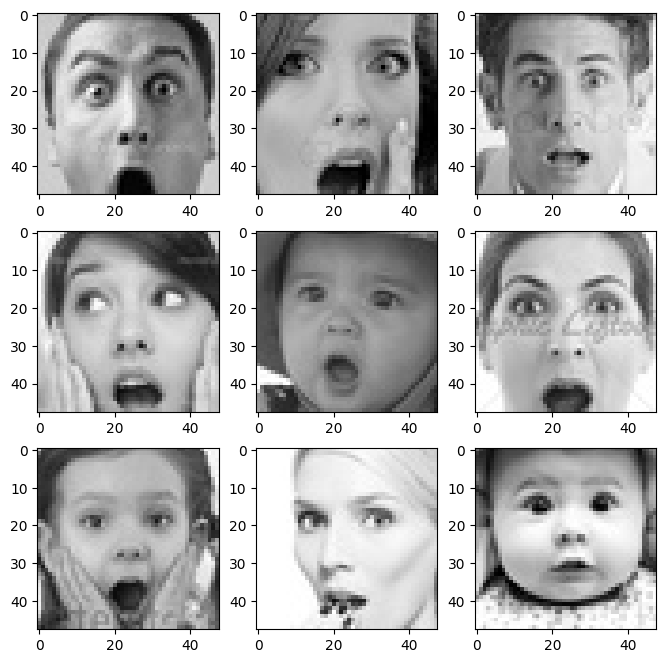

In [ ]:
expr = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_ + "train/" + expr + "/" +
                  os.listdir(folder_ + "train/" + expr)[i], target_size = (pict_size, pict_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**A person with a surprised facial expression usually has their eyes wide open and the mouth open too. It is the easiest way to detect someone with this kind of expression.

## **Checking Distribution of Classes**

In [ ]:
happy_count = len(os.listdir(folder_ + "train/happy"))
print("Number of images in the class 'happy':   ", happy_count)

sad_count =  len(os.listdir(folder_ + "train/sad"))
print("Number of images in the class 'sad':   ", sad_count)

neutral_count =  len(os.listdir(folder_ + "train/neutral"))
print("Number of images in the class 'neutral':   ", neutral_count)

surprise_count =  len(os.listdir(folder_ + "train/surprise"))
print("Number of images in the class 'surprise':   ", surprise_count)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


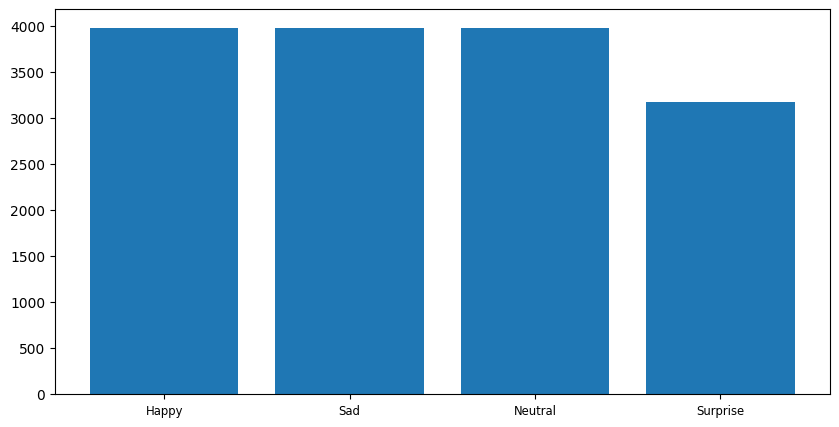

In [ ]:
plt.figure(figsize = (10, 5))

data = {'Happy': happy_count, 'Sad': sad_count, 'Neutral': neutral_count, 'Surprise' : surprise_count}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:** The classes are not equally distributed. There are a little bit more of happy, sad and neutral than surprise. But maybe it will not be a urgent issue. The nature of surprise images is well distinguished. If there were a bigger difference between sad and neutral, maybe the misconceptions could get higher because of the similarity between both facial expressions.


**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress? The classes are not equally distributed, and there is an imbalance in the number of images across the different facial expression classes. This imbalance is more pronounced in the "surprise" set class, which has lower percentage than the other classes. This can cause worse perfomance on this class, leading to poorer misconceptions.
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?  It is possible to randomly sample and visualize a fraction of images of every class in order to have the same number of images in every class and avoid bias in the perfomance of the model.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
batch_size = 32
img_size = 48

datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

train_set = datagen_train.flow_from_directory(
    folder_ + "train",
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

datagen_validation = ImageDataGenerator(
    rescale=1./255
)

validation_set = datagen_validation.flow_from_directory(
    folder_ + "validation",
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

datagen_test = ImageDataGenerator(
    rescale=1./255
)

test_set = datagen_test.flow_from_directory(
    folder_ + "test",
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? Yes, CNN can handle a variaty of tasks related to image classification. CNN are usually more accurate and are more powerful in classification problems. The size of the images is important too. ANN work better with small images, while CNN can handle bigger images, so in the context of this project, it is better to have more space to interact with the models.
* What are the advantages of CNNs over ANNs and are they applicable here? Yes, the advantages of CNN are aplicable in this project because of its nature. They use convolutional layers to learn local patterns and hierarchies, which makes them well-suited for tasks where spatial relationships are important; often more robust to overfitting, especially when dealing with limited data; the use of convolutional layers reduces the memory requirements of CNNs compared to fully connected networks. So, yes, there is a big advantage of CNN over ANN.

### **Creating the Base Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Create a Sequential model
model1 = Sequential()

# Convolutional Block 1
model1.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(48, 48, 3)))  # Adjust input_shape based on color_mode
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

# Convolutional Block 2
model1.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

# Convolutional Block 3
model1.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

# Flatten layer
model1.add(Flatten())

# Fully Connected Layers
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.4))

# Output layer
model1.add(Dense(4, activation='softmax'))

# Print model summary
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:

history = model1.fit(train_set,
    epochs=20,
    validation_data=validation_set
)

Epoch 1/20
473/473 [==============================] - 51s 104ms/step - loss: 1.3799 - accuracy: 0.2790 - val_loss: 1.3515 - val_accuracy: 0.3050
Epoch 2/20
473/473 [==============================] - 48s 102ms/step - loss: 1.2774 - accuracy: 0.4099 - val_loss: 1.1307 - val_accuracy: 0.5324
Epoch 3/20
473/473 [==============================] - 48s 101ms/step - loss: 1.1537 - accuracy: 0.4866 - val_loss: 1.0462 - val_accuracy: 0.5517
Epoch 4/20
473/473 [==============================] - 48s 101ms/step - loss: 1.0871 - accuracy: 0.5286 - val_loss: 0.9890 - val_accuracy: 0.5843
Epoch 5/20
473/473 [==============================] - 48s 101ms/step - loss: 1.0497 - accuracy: 0.5382 - val_loss: 0.9554 - val_accuracy: 0.5988
Epoch 6/20
473/473 [==============================] - 49s 103ms/step - loss: 1.0214 - accuracy: 0.5591 - val_loss: 0.9198 - val_accuracy: 0.6134
Epoch 7/20
473/473 [==============================] - 48s 102ms/step - loss: 1.0013 - accuracy: 0.5688 - val_loss: 0.8749 - val_ac

### **Evaluating the Model on the Test Set**

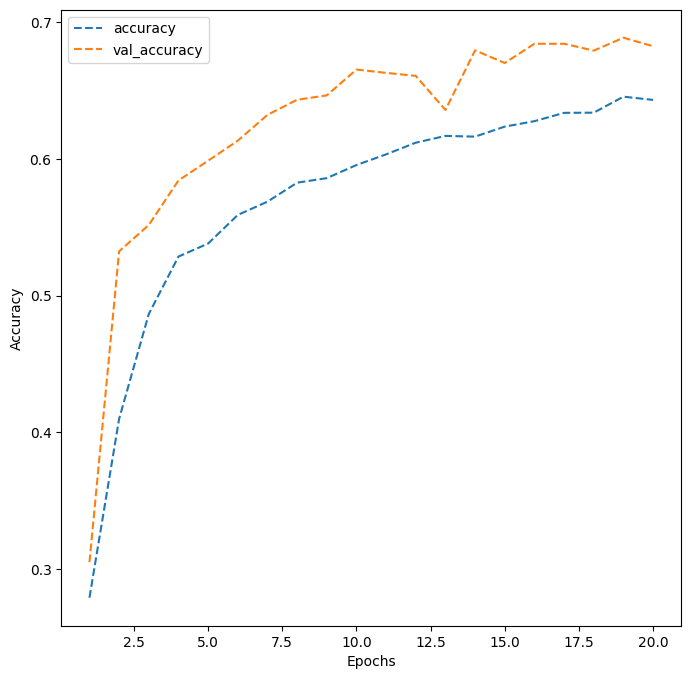

In [ ]:
acc_hist = history.history

epoch_list = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))
plt.plot(epoch_list, acc_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(epoch_list, acc_hist['val_accuracy'], ls = '--', label = 'val_accuracy')


plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.show()

In [ ]:
test_results = model1.evaluate(test_set)

# Display the evaluation results
print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")

4/4 [==============================] - 0s 19ms/step - loss: 0.7497 - accuracy: 0.6484
Test Loss: 0.7496515512466431
Test Accuracy: 0.6484375


**Observations and Insights:** The accuracy of the model is arounf 70%, even if it is a good approach, it is possible to make it more accurate. Also there is a difference about a 10% between the train and validation set, which is a big difference.

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# Creating sequential model
model2 = Sequential()

 # Convolutional Block 1
model2.add(Conv2D(256, (2, 2), padding='same', activation='relu', input_shape=(48, 48, 3)))  # Adjust input_shape based on color_mode
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
model2.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
model2.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 4
model2.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model2.add(Flatten())

# Fully Connected Layers
model2.add(Dense(512, activation='relu'))
model2.add(Dense(182, activation='relu'))


# Output layer
model2.add(Dense(4, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)      

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
history = model2.fit(train_set,
    epochs=20,
    validation_data=validation_set
)

Epoch 1/20
473/473 [==============================] - 564s 1s/step - loss: 1.2867 - accuracy: 0.3829 - val_loss: 1.3367 - val_accuracy: 0.3165
Epoch 2/20
473/473 [==============================] - 595s 1s/step - loss: 1.1102 - accuracy: 0.4990 - val_loss: 1.1847 - val_accuracy: 0.4945
Epoch 3/20
473/473 [==============================] - 554s 1s/step - loss: 0.9884 - accuracy: 0.5651 - val_loss: 0.9837 - val_accuracy: 0.5875
Epoch 4/20
473/473 [==============================] - 555s 1s/step - loss: 0.9127 - accuracy: 0.6045 - val_loss: 0.9012 - val_accuracy: 0.6152
Epoch 5/20
473/473 [==============================] - 550s 1s/step - loss: 0.8650 - accuracy: 0.6329 - val_loss: 0.8736 - val_accuracy: 0.6337
Epoch 6/20
473/473 [==============================] - 541s 1s/step - loss: 0.8179 - accuracy: 0.6535 - val_loss: 0.7837 - val_accuracy: 0.6829
Epoch 7/20
473/473 [==============================] - 547s 1s/step - loss: 0.7928 - accuracy: 0.6645 - val_loss: 0.7699 - val_accuracy: 0.6761

### **Evaluating the Model on the Test Set**

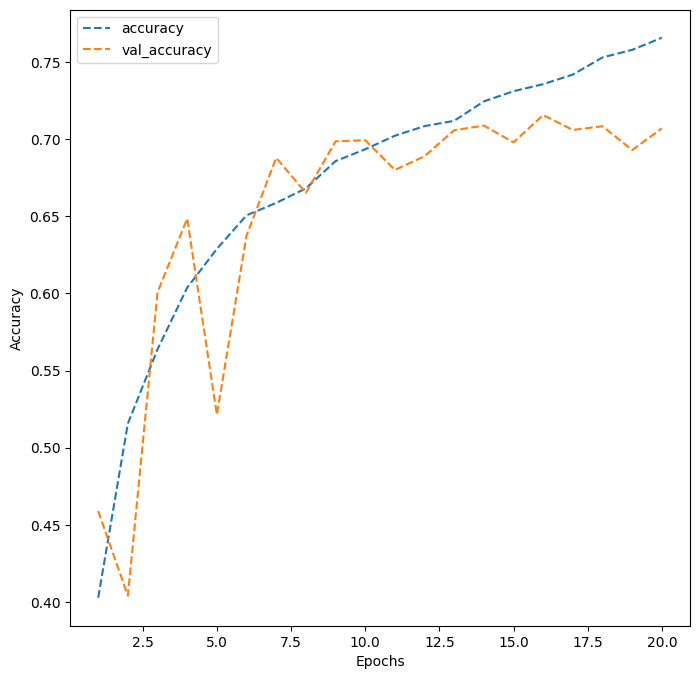

In [ ]:
acc_hist = history.history

epoch_list = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))
plt.plot(epoch_list, acc_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(epoch_list, acc_hist['val_accuracy'], ls = '--', label = 'val_accuracy')


plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.show()

In [ ]:
test_results = model2.evaluate(test_set)

# Display the evaluation results
print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")

4/4 [==============================] - 1s 130ms/step - loss: 0.7717 - accuracy: 0.7031
Test Loss: 0.7716655731201172
Test Accuracy: 0.703125


**Observations and Insights:**Adding an extra convolutional layer can make the performance of the predictions more better. For this model the accuracy is aroung 75% and there is no big difference between test and train accuracy, only aboit 5%, which points to a better model.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons? They have an accuracy arounf 60 to 70% for both models in both color palette. They have a good accuracy, but probably could be better if the segmentation were more homegeneous.
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white? Actually for the second model, the performance was better with grayscale, maybe because the images are already in that palette. Also it could be that the grayscale can achieve a better accuracy due to the nature of the scale itself that makes more pronounced the differences of color.

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_ + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(
   rescale=1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_ + "validation",
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
    )


datagen_test =  ImageDataGenerator(
   rescale=1./255)

test_set = datagen_test.flow_from_directory(folder_ + "test",
                                    target_size = (img_size, img_size),
                                    color_mode = 'rgb',
                                    batch_size = batch_size,
                                    class_mode = 'categorical',
                                    classes = ['happy', 'sad', 'neutral', 'surprise'],
                                    shuffle = False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False


x = vgg.output

x = Flatten()(transfer_layer.output)

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation='relu')(x)

x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)

x = BatchNormalization()(x)

pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred)

### **Compiling and Training the VGG16 Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
vggmodel.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [ ]:
history= vggmodel.fit(
    train_set,
    epochs=epochs,
    validation_data=validation_set)

Epoch 1/20
473/473 [==============================] - 526s 1s/step - loss: 1.3347 - accuracy: 0.3747 - val_loss: 1.2802 - val_accuracy: 0.4244
Epoch 2/20
473/473 [==============================] - 527s 1s/step - loss: 1.2190 - accuracy: 0.4353 - val_loss: 1.2585 - val_accuracy: 0.4121
Epoch 3/20
473/473 [==============================] - 543s 1s/step - loss: 1.1904 - accuracy: 0.4596 - val_loss: 1.2132 - val_accuracy: 0.4037
Epoch 4/20
473/473 [==============================] - 526s 1s/step - loss: 1.1771 - accuracy: 0.4727 - val_loss: 1.3092 - val_accuracy: 0.3584
Epoch 5/20
473/473 [==============================] - 526s 1s/step - loss: 1.1610 - accuracy: 0.4831 - val_loss: 1.2674 - val_accuracy: 0.4350
Epoch 6/20
473/473 [==============================] - 527s 1s/step - loss: 1.1510 - accuracy: 0.4818 - val_loss: 1.2251 - val_accuracy: 0.4456
Epoch 7/20
473/473 [==============================] - 542s 1s/step - loss: 1.1370 - accuracy: 0.4918 - val_loss: 1.2737 - val_accuracy: 0.4083

### **Evaluating the VGG16 model**

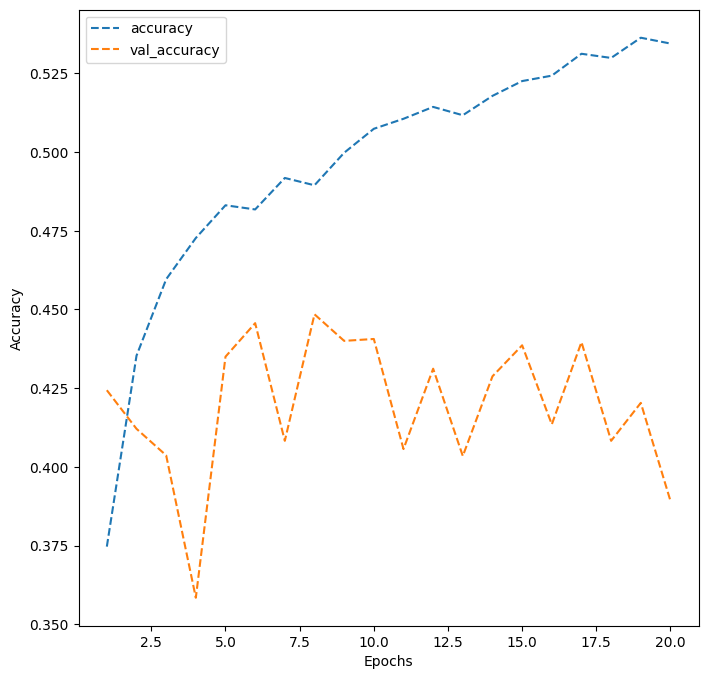

In [ ]:
acc_hist = history.history

epoch_list = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))
plt.plot(epoch_list, acc_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(epoch_list, acc_hist['val_accuracy'], ls = '--', label = 'val_accuracy')


plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.show()

In [ ]:
test_results = vggmodel.evaluate(test_set)

# Display the evaluation results
print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")

4/4 [==============================] - 3s 684ms/step - loss: 1.0461 - accuracy: 0.5469
Test Loss: 1.0461114645004272
Test Accuracy: 0.546875


**Think About It:**

- What do you infer from the general trend in the training performance? The accuracy increases as the model goes ahead.
- Is the training accuracy consistently improving? Yes, it improves with time
- Is the validation accuracy also improving similarly? And the validation accuracy improves as well.

**Observations and Insights:** Even if the accuracy for this model is good, it still has a low one in contrast to the first two models.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

171446536/171446536 [==============================] - 2s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                   

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False

# Add classification layers on top of it
x = Flatten()(transfer_layer_Resnet.output)

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer_Resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)


# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

resnetmodel = Model(Resnet.input, pred) # Initializing the model

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Resnetmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping =early_stopping = EarlyStopping(monitor='val_acc', patience=3, verbose=1, restore_best_weights=True) # Write your code here. You may play around with the hyperparameters if you wish.


reduce_learningrate = reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_lr=1e-6) # Write your code here. You may play around with the hyperparameters if you wish.


callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

In [ ]:
resnetmodel.compile(optimizer=Adam(lr=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
history =resnetmodel.fit(train_set,
                epochs=10,
                validation_data=validation_set,
                callbacks=callbacks_list)


Epoch 1/10
473/473 [==============================] - ETA: 0s - loss: 1.4627 - accuracy: 0.2566

473/473 [==============================] - 367s 757ms/step - loss: 1.4627 - accuracy: 0.2566 - val_loss: 1.3972 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 2/10
473/473 [==============================] - ETA: 0s - loss: 1.4077 - accuracy: 0.2579

473/473 [==============================] - 357s 756ms/step - loss: 1.4077 - accuracy: 0.2579 - val_loss: 1.3558 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 3/10
473/473 [==============================] - ETA: 0s - loss: 1.3997 - accuracy: 0.2614

473/473 [==============================] - 356s 753ms/step - loss: 1.3997 - accuracy: 0.2614 - val_loss: 1.3965 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 4/10
473/473 [==============================] - ETA: 0s - loss: 1.3953 - accuracy: 0.2616


Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 357s 754ms/step - loss: 1.3953 - accuracy: 0.2616 - val_loss: 1.3968 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 5/10
473/473 [==============================] - ETA: 0s - loss: 1.3901 - accuracy: 0.2616

473/473 [==============================] - 357s 755ms/step - loss: 1.3901 - accuracy: 0.2616 - val_loss: 1.3678 - val_accuracy: 0.3667 - lr: 2.0000e-04
Epoch 6/10
473/473 [==============================] - ETA: 0s - loss: 1.3865 - accuracy: 0.2649


Epoch 6: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
473/473 [==============================] - 355s 750ms/step - loss: 1.3865 - accuracy: 0.2649 - val_loss: 1.3791 - val_accuracy: 0.2443 - lr: 2.0000e-04
Epoch 7/10
473/473 [==============================] - ETA: 0s - loss: 1.3872 - accuracy: 0.2623

473/473 [==============================] - 358s 756ms/step - loss: 1.3872 - accuracy: 0.2623 - val_loss: 1.3774 - val_accuracy: 0.2443 - lr: 4.0000e-05
Epoch 8/10
473/473 [==============================] - ETA: 0s - loss: 1.3849 - accuracy: 0.2703


Epoch 8: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
473/473 [==============================] - 357s 754ms/step - loss: 1.3849 - accuracy: 0.2703 - val_loss: 1.3758 - val_accuracy: 0.2443 - lr: 4.0000e-05
Epoch 9/10
473/473 [==============================] - ETA: 0s - loss: 1.3873 - accuracy: 0.2577

473/473 [==============================] - 356s 752ms/step - loss: 1.3873 - accuracy: 0.2577 - val_loss: 1.3767 - val_accuracy: 0.2443 - lr: 8.0000e-06
Epoch 10/10
473/473 [==============================] - ETA: 0s - loss: 1.3859 - accuracy: 0.2595


Epoch 10: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
473/473 [==============================] - 357s 753ms/step - loss: 1.3859 - accuracy: 0.2595 - val_loss: 1.3768 - val_accuracy: 0.2443 - lr: 8.0000e-06


### **Evaluating the ResNet Model**

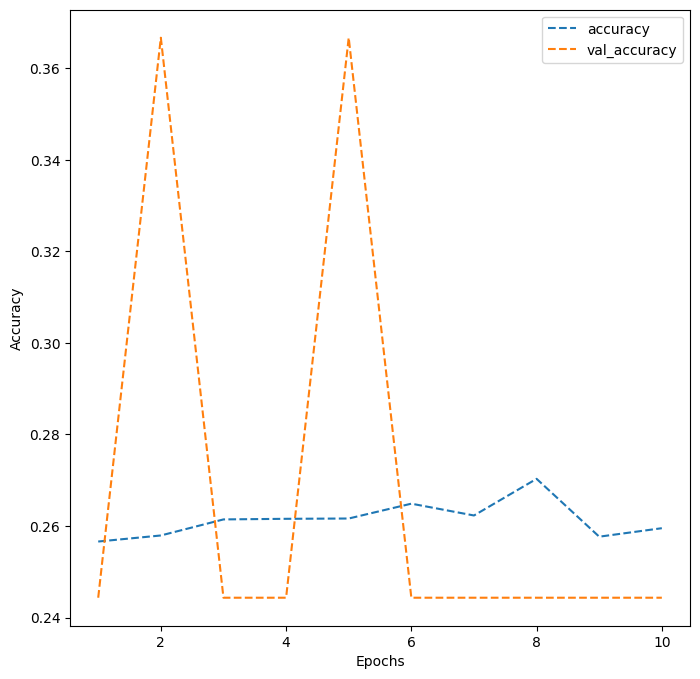

In [ ]:
acc_hist = history.history

epoch_list = [i for i in range(1, 11)]

plt.figure(figsize = (8, 8))
plt.plot(epoch_list, acc_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(epoch_list, acc_hist['val_accuracy'], ls = '--', label = 'val_accuracy')


plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.show()

In [ ]:
test_results = resnetmodel.evaluate(test_set)

# Display the evaluation results
print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")

4/4 [==============================] - 2s 443ms/step - loss: 1.3878 - accuracy: 0.2500
Test Loss: 1.387819766998291
Test Accuracy: 0.25


**Observations and Insights:** For this architecture, the accuracy is similar to VGG16, low and non significant.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

35839040/35839040 [==============================] - 0s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_3[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

x = Flatten()(transfer_layer_EfficientNet.output)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation='softmax')(x)

Efficientnetmodel = Model(EfficientNet.input, pred)

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_acc', patience=3, verbose=1, restore_best_weights=True)

# Define Reduce Learning Rate
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_lr=1e-6)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]


In [ ]:
Efficientnetmodel.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
history = Efficientnetmodel.fit(train_set,
                      epochs=20,
                      validation_data=validation_set,
                      callbacks=callbacks_list)


Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.4910 - accuracy: 0.2502

473/473 [==============================] - 119s 224ms/step - loss: 1.4910 - accuracy: 0.2502 - val_loss: 1.4914 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.4095 - accuracy: 0.2588

473/473 [==============================] - 105s 223ms/step - loss: 1.4095 - accuracy: 0.2588 - val_loss: 1.3945 - val_accuracy: 0.2280 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.4002 - accuracy: 0.2602

473/473 [==============================] - 106s 225ms/step - loss: 1.4002 - accuracy: 0.2602 - val_loss: 1.3491 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.3954 - accuracy: 0.2618

473/473 [==============================] - 107s 225ms/step - loss: 1.3954 - accuracy: 0.2618 - val_loss: 1.3942 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.3935 - accuracy: 0.2666


Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 107s 226ms/step - loss: 1.3935 - accuracy: 0.2666 - val_loss: 1.3716 - val_accuracy: 0.2291 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.3887 - accuracy: 0.2557

473/473 [==============================] - 105s 222ms/step - loss: 1.3887 - accuracy: 0.2557 - val_loss: 1.3611 - val_accuracy: 0.3675 - lr: 2.0000e-04
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.3869 - accuracy: 0.2632


Epoch 7: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
473/473 [==============================] - 107s 225ms/step - loss: 1.3869 - accuracy: 0.2632 - val_loss: 1.5832 - val_accuracy: 0.2289 - lr: 2.0000e-04
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 1.3857 - accuracy: 0.2587

473/473 [==============================] - 104s 220ms/step - loss: 1.3857 - accuracy: 0.2587 - val_loss: 1.3625 - val_accuracy: 0.3289 - lr: 4.0000e-05
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 1.3851 - accuracy: 0.2692


Epoch 9: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
473/473 [==============================] - 105s 221ms/step - loss: 1.3851 - accuracy: 0.2692 - val_loss: 1.3643 - val_accuracy: 0.3088 - lr: 4.0000e-05
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 1.3836 - accuracy: 0.2624

473/473 [==============================] - 106s 225ms/step - loss: 1.3836 - accuracy: 0.2624 - val_loss: 1.3656 - val_accuracy: 0.3078 - lr: 8.0000e-06
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 1.3852 - accuracy: 0.2665


Epoch 11: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
473/473 [==============================] - 105s 221ms/step - loss: 1.3852 - accuracy: 0.2665 - val_loss: 1.3638 - val_accuracy: 0.3132 - lr: 8.0000e-06
Epoch 12/20
473/473 [==============================] - ETA: 0s - loss: 1.3854 - accuracy: 0.2680

473/473 [==============================] - 106s 225ms/step - loss: 1.3854 - accuracy: 0.2680 - val_loss: 1.3633 - val_accuracy: 0.3339 - lr: 1.6000e-06
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 1.3865 - accuracy: 0.2610


Epoch 13: ReduceLROnPlateau reducing learning rate to 1e-06.
473/473 [==============================] - 106s 225ms/step - loss: 1.3865 - accuracy: 0.2610 - val_loss: 1.3642 - val_accuracy: 0.3267 - lr: 1.6000e-06
Epoch 14/20
473/473 [==============================] - ETA: 0s - loss: 1.3865 - accuracy: 0.2612

473/473 [==============================] - 105s 222ms/step - loss: 1.3865 - accuracy: 0.2612 - val_loss: 1.3648 - val_accuracy: 0.3207 - lr: 1.0000e-06
Epoch 15/20
473/473 [==============================] - ETA: 0s - loss: 1.3861 - accuracy: 0.2604

473/473 [==============================] - 105s 222ms/step - loss: 1.3861 - accuracy: 0.2604 - val_loss: 1.3643 - val_accuracy: 0.3253 - lr: 1.0000e-06
Epoch 16/20
473/473 [==============================] - ETA: 0s - loss: 1.3842 - accuracy: 0.2677

473/473 [==============================] - 106s 224ms/step - loss: 1.3842 - accuracy: 0.2677 - val_loss: 1.3647 - val_accuracy: 0.3134 - lr: 1.0000e-06
Epoch 17/20
473/473 [==============================] - ETA: 0s - loss: 1.3845 - accuracy: 0.2690

473/473 [==============================] - 106s 224ms/step - loss: 1.3845 - accuracy: 0.2690 - val_loss: 1.3648 - val_accuracy: 0.3159 - lr: 1.0000e-06
Epoch 18/20
473/473 [==============================] - ETA: 0s - loss: 1.3861 - accuracy: 0.2591

473/473 [==============================] - 105s 221ms/step - loss: 1.3861 - accuracy: 0.2591 - val_loss: 1.3637 - val_accuracy: 0.3337 - lr: 1.0000e-06
Epoch 19/20
473/473 [==============================] - ETA: 0s - loss: 1.3848 - accuracy: 0.2602

473/473 [==============================] - 105s 222ms/step - loss: 1.3848 - accuracy: 0.2602 - val_loss: 1.3637 - val_accuracy: 0.3241 - lr: 1.0000e-06
Epoch 20/20
473/473 [==============================] - ETA: 0s - loss: 1.3853 - accuracy: 0.2663

473/473 [==============================] - 106s 224ms/step - loss: 1.3853 - accuracy: 0.2663 - val_loss: 1.3636 - val_accuracy: 0.3303 - lr: 1.0000e-06


### **Evaluating the EfficientnetNet Model**

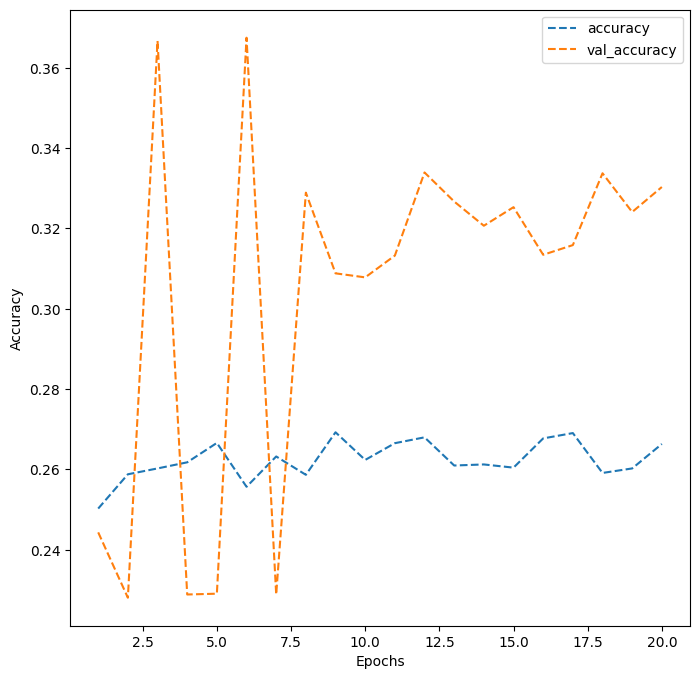

In [ ]:
acc_hist = history.history

epoch_list = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))
plt.plot(epoch_list, acc_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(epoch_list, acc_hist['val_accuracy'], ls = '--', label = 'val_accuracy')


plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.show()

In [ ]:
test_results = Efficientnetmodel.evaluate(test_set)

# Display the evaluation results
print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")

4/4 [==============================] - 0s 111ms/step - loss: 1.3973 - accuracy: 0.2500
Test Loss: 1.397284746170044
Test Accuracy: 0.25


**Observations and Insights:** For VGG16 and EfficentNet models, the accuracy stays low for both color scales.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?  Most of the models accuracy lies between 70 and 75% (depends of the color scale). For the first two models, it is possible to obtain a good perfomance with few layers and few epochs, but for the next ones, the accuracy gets low. For example, for EfficentNet and VGG16 the accuracy doesn't achieve over 60%, which is a really low accuracy. The accuracy can be better, so the satisfaction of the model perfomance is in a medium level. Also, the color scales affects directly the perfomance of every model.


* Do you think our issue lies with 'rgb' color_mode? Yes, I have noticed that most of the issues related with accuracy lies in color model. For rgb the perfomance is not that good as in gray, maybe because of the difference of saturation present in gray.

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
batch_size = 32
img_size = 48

datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

train_set = datagen_train.flow_from_directory(
    folder_ + "train",
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

datagen_validation = ImageDataGenerator(
    rescale=1./255
)

validation_set = datagen_validation.flow_from_directory(
    folder_ + "validation",
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

datagen_test = ImageDataGenerator(
    rescale=1./255
)

test_set = datagen_test.flow_from_directory(
    folder_ + "test",
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


NameError: ignored

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, LeakyReLU, Dropout

no_of_classes = 4

model3 = Sequential()

# Add 1st CNN Block
model3.add(Conv2D(64, (2, 2), padding='same', input_shape=(48, 48, 1), activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Add 2nd CNN Block
model3.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Add 3rd CNN Block
model3.add(Conv2D(512, (2, 2), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Add 4th CNN Block
model3.add(Conv2D(512, (2, 2), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Add 5th CNN Block
model3.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(Dropout(0.2))

# Second fully connected layer
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(Dropout(0.2))

model3.add(Dense(no_of_classes, activation='softmax'))


### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [ ]:
from keras.optimizers import Adam

# Compile the model
model3.compile(optimizer=Adam(learning_rate=0.003),
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [ ]:
history = model3.fit(train_set,
                     epochs=epochs,
                     validation_data=validation_set)

Epoch 1/35
473/473 [==============================] - 401s 838ms/step - loss: 1.5126 - accuracy: 0.2729 - val_loss: 1.4131 - val_accuracy: 0.2363
Epoch 2/35
473/473 [==============================] - 391s 827ms/step - loss: 1.3555 - accuracy: 0.3347 - val_loss: 1.2336 - val_accuracy: 0.4268
Epoch 3/35
473/473 [==============================] - 392s 829ms/step - loss: 1.2744 - accuracy: 0.3884 - val_loss: 1.3770 - val_accuracy: 0.3195
Epoch 4/35
473/473 [==============================] - 394s 832ms/step - loss: 1.1782 - accuracy: 0.4567 - val_loss: 1.0016 - val_accuracy: 0.5696
Epoch 5/35
473/473 [==============================] - 395s 836ms/step - loss: 1.0805 - accuracy: 0.5221 - val_loss: 0.9918 - val_accuracy: 0.5785
Epoch 6/35
473/473 [==============================] - 395s 835ms/step - loss: 1.0228 - accuracy: 0.5509 - val_loss: 0.8996 - val_accuracy: 0.6112
Epoch 7/35
473/473 [==============================] - 386s 816ms/step - loss: 1.0004 - accuracy: 0.5625 - val_loss: 0.7969 -

### **Evaluating the Model on Test Set**

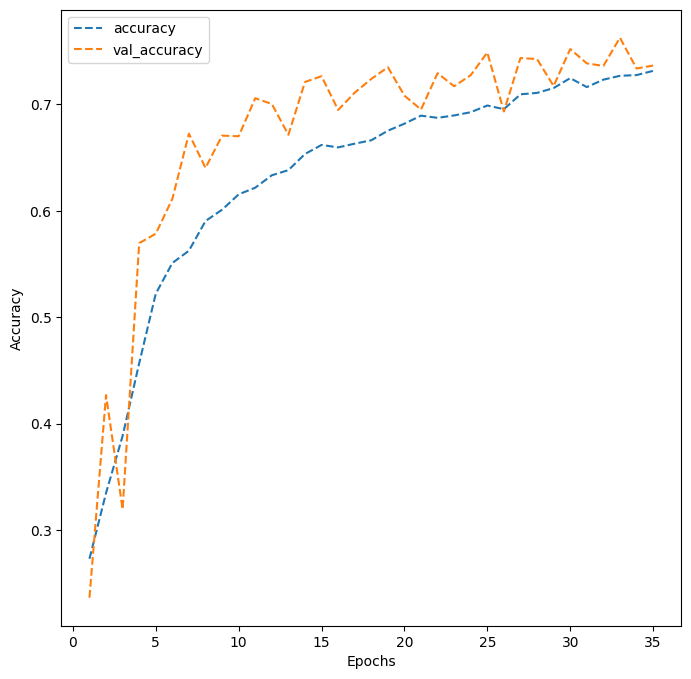

In [ ]:
acc_hist = history.history

epoch_list = [i for i in range(1, 36)]

plt.figure(figsize = (8, 8))
plt.plot(epoch_list, acc_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(epoch_list, acc_hist['val_accuracy'], ls = '--', label = 'val_accuracy')


plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.show()

In [ ]:
test_results = model3.evaluate(test_set)

# Display the evaluation results
print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")

1/1 [==============================] - 1s 1s/step - loss: 0.9993 - accuracy: 0.5312
Test Loss: 0.9992600083351135
Test Accuracy: 0.53125


**Observations and Insights:** For this model the accuracy improves much more in comparison to the others, maybe because for the color scale. But it has a lower accuracy when comparing with CNN models.

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 1s 138ms/step
              precision    recall  f1-score   support

       happy       0.80      0.88      0.84        32
         sad       0.24      0.25      0.24        32
     neutral       0.23      0.25      0.24        32
    surprise       1.00      0.75      0.86        32

    accuracy                           0.53       128
   macro avg       0.57      0.53      0.54       128
weighted avg       0.57      0.53      0.54       128



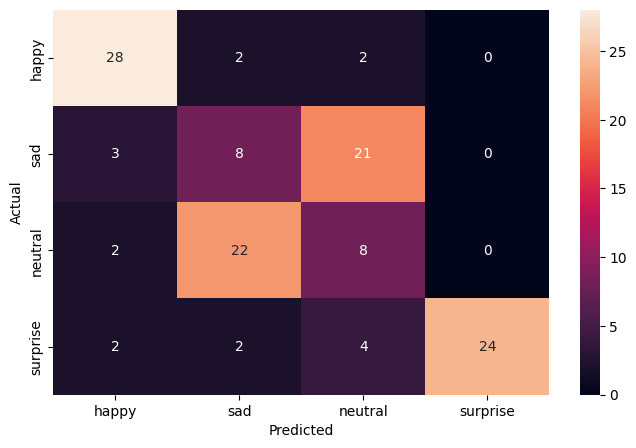

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_ + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model3.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred, target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['happy', 'sad', 'neutral', 'surprise'], yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:** For every model, the most difficult expressions are sadness and neutral, so they are complicated to identify and recognize. It could be an improvement of performance if there were more concrete images of each expression.

## **Conclusion:** As I mentioned in my previous insights, the identification of neutral and sadness expressions depend a lot of the nature of the image, as both can be difficult to differenciate. As a person can look sad it can look neutral because there is no such barrier between two such as for hapiness or surprise that involve more facial expressions. Both expressions Another characteristic that can impact the model directly is the color scale. As seen in the previous models, rgb is not the best option. While grayscale has not the best accuracies, they are higher in that color scale, possibly because of the differences of colors and light saturations. As conclusion, it is possible to make a better model, the quality of the data was important here too. The differences between the images must be clear and free of ambiguity as possible.

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem? There are complications at the moment of recognizing certain expressions because of the ambiguity of the emotions themselves. Also, the fact that the images are in gray makes easier the recognition of certain emotions, like hapiness and surprise that involve more facil movement. The color of the images makes the recognition more suitable with grayscales analysis.

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further? The model with the best perfomance is the model 3 of CNN, with a higher accuracy compared to the others, greater than 75%. Maybe because of the color scale. The model could get better if a extra layers are added.

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt? The model 3 of CNN was the one with the best accuracy. It takes a while to complete the process, but is the one with the highest accuracy. It is the best option to adopt because is the one that has higher accuracy, even if it takes several hours to run, there are a lot more advatages of chosing this model. Specifying that the models work much better when studying the images in grayscale.